In [204]:
import Investment_management_library as iml
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
prices = pd.read_csv(r"D:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\data\sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


# Returns, Volatility, Annualized

In [4]:
prices_returns = iml.returns(prices)
prices_returns.dropna(inplace=True)
prices_returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [5]:
print("Standard deviation as a risk measure: \n", prices_returns.std())

Standard deviation as a risk measure: 
 BLUE      0.023977
ORANGE    0.079601
dtype: float64


In [6]:
prices_returns_deviations = prices_returns - prices_returns.mean()
prices_returns_deviations_squared = prices_returns_deviations ** 2
prices_variance = prices_returns_deviations_squared.mean()
volatility = np.sqrt(prices_variance) # Minor difference with std dev due to DOF n instead of n-1
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [7]:
prices_returns_deviations = prices_returns - prices_returns.mean()
prices_returns_deviations_squared = prices_returns_deviations ** 2
variance = prices_returns_deviations_squared.sum() / (prices_returns_deviations_squared.shape[0] - 1)
volatility = np.sqrt(variance) # No difference with std dev due to DOF n-1
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [8]:
#Annualized volatility
annualized_volatility = volatility * np.sqrt(12) # Volatility is monthly, so multiply by sqrt(12) to get annualized
annualized_volatility

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Drawdown

In [9]:
columns = ["Lo 10", "Hi 10"]  
returns = iml.get_ffme_returns(columns)
returns.columns = ["Small Caps", "Large Caps"]
returns.head()

,Small Caps,Large Caps
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [10]:
print("Max drawdown of Large caps = ", -iml.drawdown(returns["Large Caps"])["Drawdown"].min())
print("Max drawdown of Small caps = ", -iml.drawdown(returns["Small Caps"])["Drawdown"].min())

Max drawdown of Large caps =  0.8400375277943123
Max drawdown of Small caps =  0.8330007793945304


# Deviations from Normality

In [11]:
hedge_fund_index_returns = iml.get_hfi_returns()
hedge_fund_index_returns.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [12]:
pd.concat([hedge_fund_index_returns.mean(), hedge_fund_index_returns.median(), hedge_fund_index_returns.mean() > hedge_fund_index_returns.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [13]:
iml.skewness(hedge_fund_index_returns).sort_values() 

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [14]:
np.sort(stats.skew(hedge_fund_index_returns))

array([-3.94032029, -2.63959223, -2.12443538, -1.81546975, -1.40915356,
       -1.32008333, -1.30084204, -1.16706749, -0.39022677, -0.36178308,
        0.17369864,  0.76797484,  0.98292188])

In [15]:
iml.kurtosis(hedge_fund_index_returns).sort_values() # Normal kurtois is 3

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [16]:
np.sort(stats.kurtosis(hedge_fund_index_returns)) # Excess kurtosis 

array([-0.04703963,  1.52389258,  2.74167945,  3.11777175,  4.07015278,
        4.88998336,  5.03582817,  5.73894979,  6.25078841,  9.12120787,
       14.21855526, 20.28083446, 26.84219928])

In [17]:
stats.jarque_bera(hedge_fund_index_returns) # JB test for normality

SignificanceResult(statistic=25656.585999171337, pvalue=0.0)

In [18]:
iml.is_normal_jb(hedge_fund_index_returns) # Considers entire dataframe as a single array

False

In [19]:
hedge_fund_index_returns.aggregate(iml.is_normal_jb)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [20]:
hedge_fund_index_returns.aggregate(stats.shapiro) # Shapiro test for normality

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
0,7.879996e-01,0.995334,9.281195e-01,9.264939e-01,8.642052e-01,9.211223e-01,6.692666e-01,9.504761e-01,0.977071,9.301524e-01,8.833455e-01,9.563230e-01,9.356613e-01
1,3.471191e-18,0.612311,5.535085e-10,3.990001e-10,1.769577e-14,1.396714e-10,2.383942e-22,8.744158e-08,0.000304,8.390454e-10,2.551258e-13,4.086319e-07,2.695483e-09


In [21]:
hedge_fund_index_returns.aggregate(iml.is_normal_shapiro)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

# Downside

In [22]:
hfi = iml.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


Semideviation == standard deviation of negative returns

In [23]:
iml.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR and CVaR

- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fischer VaR

Conditional VaR is the expectation of returns when VaR is breached.

In [24]:
np.percentile(hfi, 5, axis = 0)   # 5%ile VaR, but column names are lost

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [25]:
iml.var_historic(hfi, level = 5)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [26]:
iml.var_gaussian(hfi, level = 5)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [27]:
iml.var_cornish_fisher(hfi, level = 5)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

,Historic,Gaussian,Cornish-Fisher
Convertible Arbitrage,0.01576,0.021691,0.025166
CTA Global,0.03169,0.034235,0.033094
Distressed Securities,0.01966,0.021032,0.025102
Emerging Markets,0.04247,0.047164,0.053011
Equity Market Neutral,0.00814,0.008850,0.010734
Event Driven,0.02535,0.021144,0.025516
Fixed Income Arbitrage,0.00787,0.014579,0.017881
Global Macro,0.01499,0.018766,0.013581
Long/Short Equity,0.02598,0.026397,0.027935
Merger Arbitrage,0.01047,0.010435,0.012612


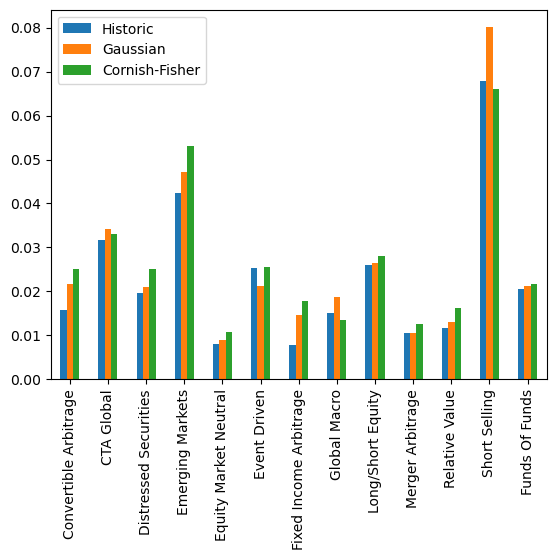

In [28]:
var_list = [iml.var_historic(hfi), iml.var_gaussian(hfi), iml.var_cornish_fisher(hfi)]
var_list = pd.concat(var_list, axis = 1)
var_list.columns = ["Historic", "Gaussian", "Cornish-Fisher"]
var_list.plot.bar()
var_list 

,Historic,Gaussian,Cornish-Fisher
Convertible Arbitrage,0.036550,0.049687,0.058200
CTA Global,0.041264,0.043527,0.042000
Distressed Securities,0.036429,0.040864,0.055600
Emerging Markets,0.072364,0.083820,0.092488
Equity Market Neutral,0.016879,0.018292,0.021044
Event Driven,0.038336,0.037440,0.039331
Fixed Income Arbitrage,0.028257,0.052500,0.052500
Global Macro,0.020629,0.025783,0.019244
Long/Short Equity,0.041943,0.043162,0.044558
Merger Arbitrage,0.019143,0.019143,0.023400


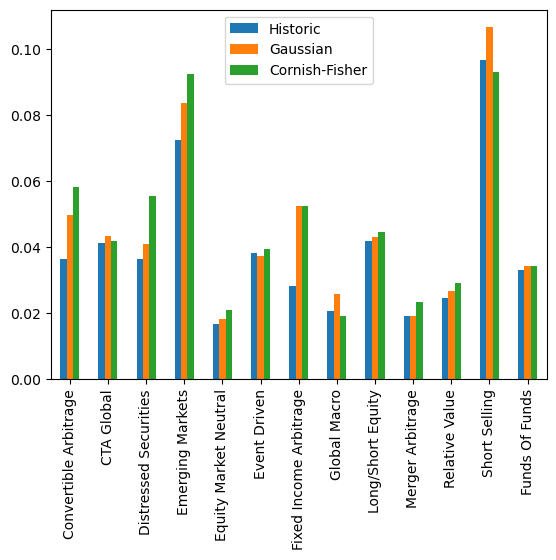

In [29]:
cvar_list = [iml.cvar_historic(hfi), iml.cvar_gaussian(hfi), iml.cvar_cornish_fisher(hfi)]
cvar_list = pd.concat(cvar_list, axis = 1)
cvar_list.columns = ["Historic", "Gaussian", "Cornish-Fisher"]
cvar_list.plot.bar()
cvar_list 

# Industry returns

In [30]:
ind = iml.get_ind_returns()
ind.head()

d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\Investment_management_library.py:224: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv(r"D:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\data\ind30_m_vw_rets.csv",


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<Axes: >

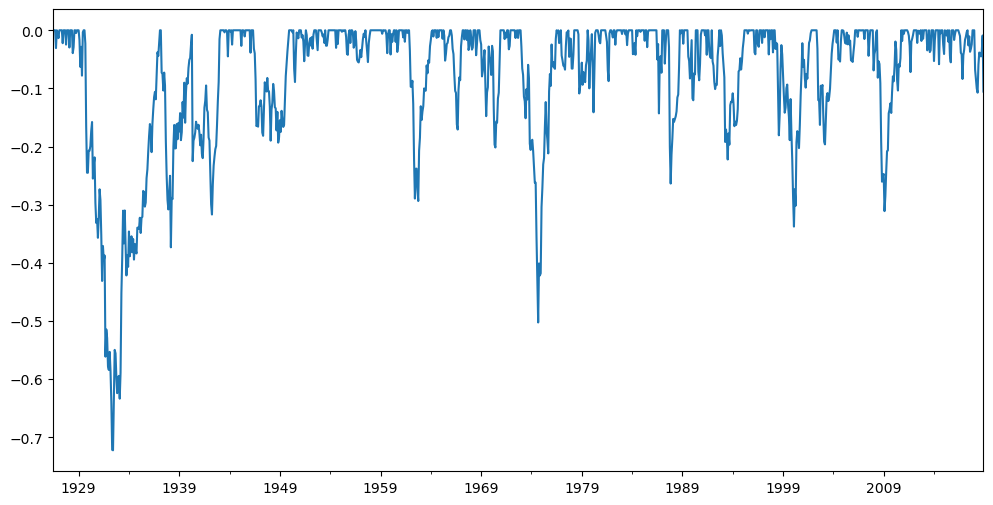

In [31]:
iml.drawdown(ind["Food"])["Drawdown"].plot.line(figsize = (12, 6))


<Axes: >

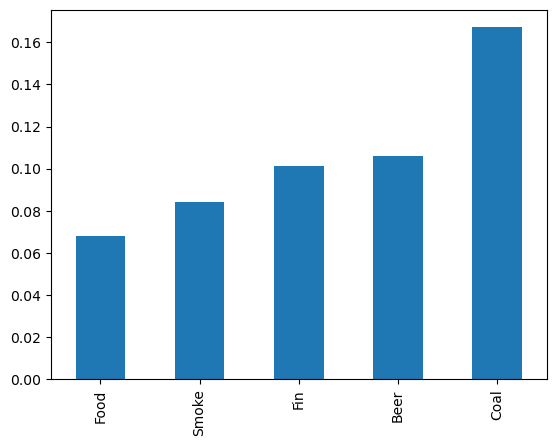

In [32]:
iml.var_gaussian(ind[['Food', 'Smoke', 'Coal', 'Beer', 'Fin']]).sort_values().plot.bar()

In [33]:
print(iml.var_cornish_fisher(ind).sort_values().head())
print(iml.var_cornish_fisher(ind).sort_values().tail())

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64
Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64


c:\Users\ravis\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\ravis\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<Axes: title={'center': 'Industry Sharpe Ratios 1926-2018'}>

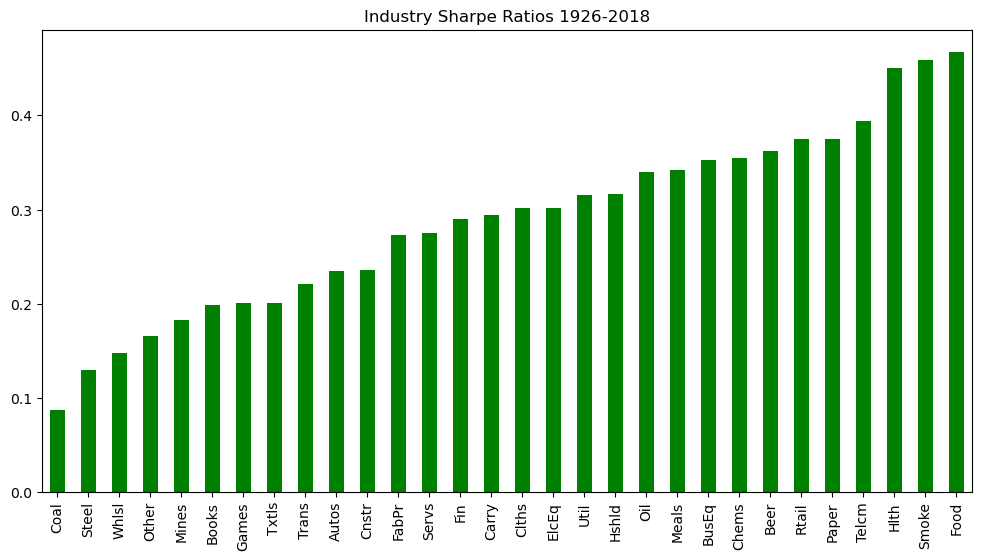

In [34]:
iml.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 1926-2018", color = "green", figsize = (12, 6))

c:\Users\ravis\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\ravis\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<Axes: title={'center': 'Industry Sharpe Ratios 2000-2018'}>

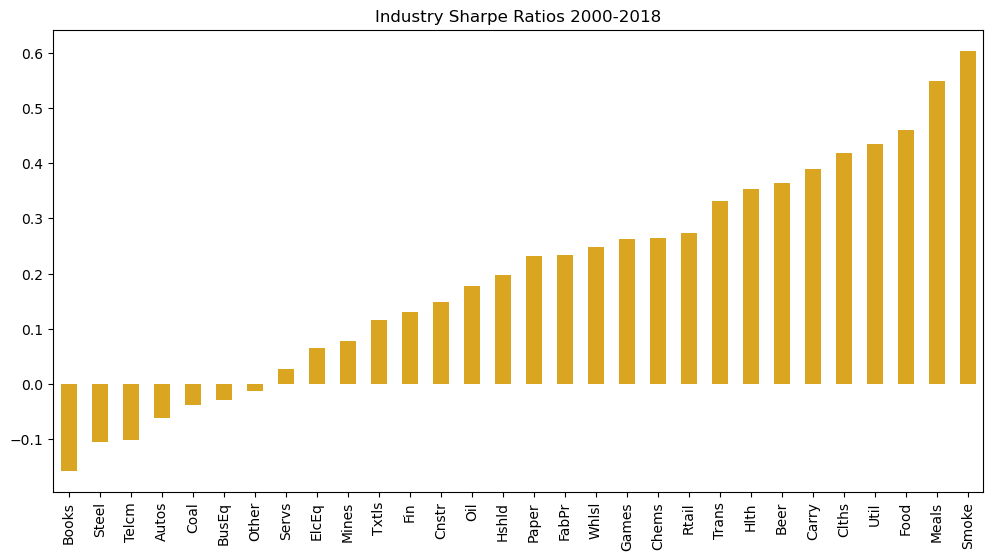

In [35]:
iml.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 2000-2018", color = "goldenrod", figsize = (12, 6))

# Efficient Frontier

Considering historical returns as expected returns

c:\Users\ravis\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<Axes: title={'center': 'Expected Returns 1995-2000'}>

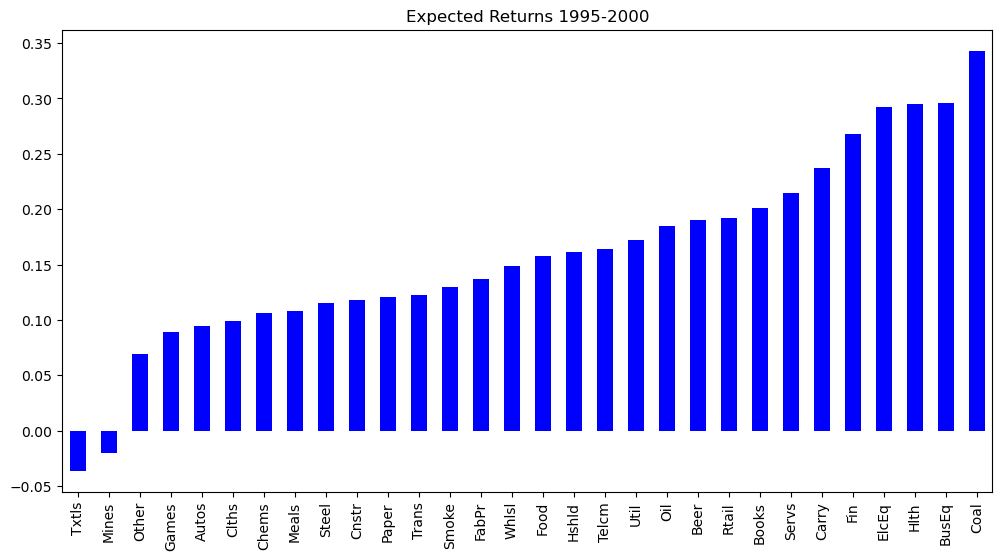

In [36]:
exp_ret = iml.annualized_returns(ind["1995":"2000"], 12)
exp_ret.sort_values().plot.bar(title = "Expected Returns 1995-2000", color = "blue", figsize = (12, 6))

In [37]:
cov = ind["1995":"2000"].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


In [38]:
sectors = ["Food", "Beer", "Smoke", "Coal"]
print(exp_ret[sectors])
print(cov.loc[sectors, sectors])

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64
           Food      Beer     Smoke      Coal
Food   0.002287  0.002077  0.001757  0.000034
Beer   0.002077  0.004599  0.001143  0.001261
Smoke  0.001757  0.001143  0.007130 -0.000544
Coal   0.000034  0.001261 -0.000544  0.016153


In [39]:
weights = np.repeat(1/4, 4)
print(iml.portfolio_return(weights, exp_ret[sectors]))
print(iml.portfolio_vol(weights, cov.loc[sectors, sectors]))

0.20496820684146116
0.05100412722141178


# 2 Assets Frontier

<Axes: xlabel='Volatility'>

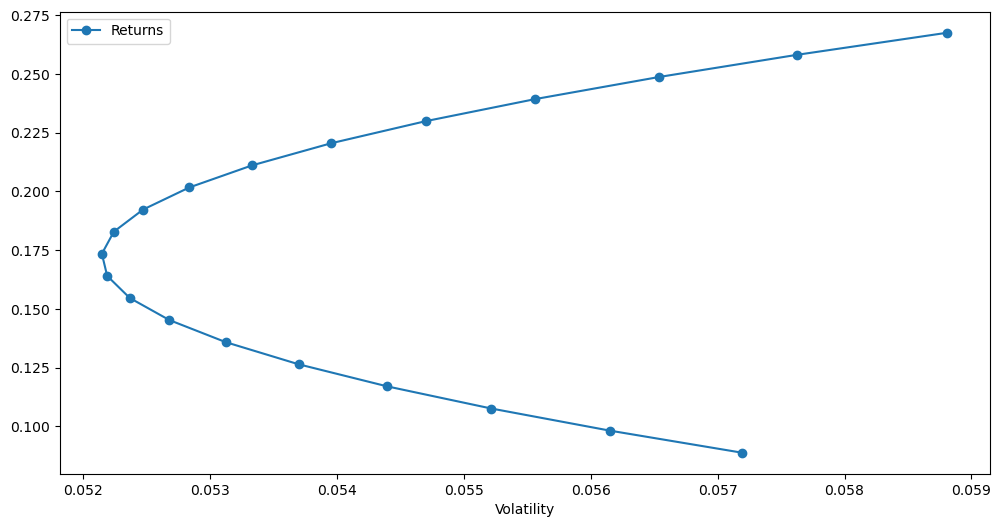

In [40]:
sectors = ["Games", "Fin"]
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
rets = [iml.portfolio_return(w, exp_ret[sectors]) for w in weights]
vols = [iml.portfolio_vol(w, cov.loc[sectors, sectors]) for w in weights]
eff_frontier = pd.DataFrame({"Returns": rets, "Volatility": vols})
eff_frontier.plot.line(x = "Volatility", y = "Returns", style = "-o", figsize = (12, 6))

<Axes: xlabel='Volatility'>

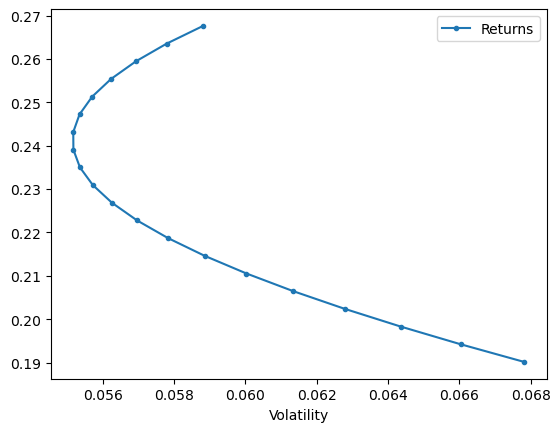

In [41]:
sectors = ["Beer", "Fin"]
iml.plot_2A_effrontier(n_points=20, exp_rets=exp_ret[sectors], cov=cov.loc[sectors, sectors])

# N Asset Efficient Frontier

In [42]:
sectors = ["Smoke", "Games", "Fin", "Coal"]
w15 = iml.minimize_vol(0.15, exp_ret[sectors], cov.loc[sectors, sectors])
vol15 = iml.portfolio_vol(w15, cov.loc[sectors, sectors])
ret15 = iml.portfolio_return(w15, exp_ret[sectors])
print(w15, vol15, ret15)

[0.25764099 0.48647509 0.18903221 0.06685172] 0.04639638757778614 0.149999999966643


<Axes: xlabel='Volatility'>

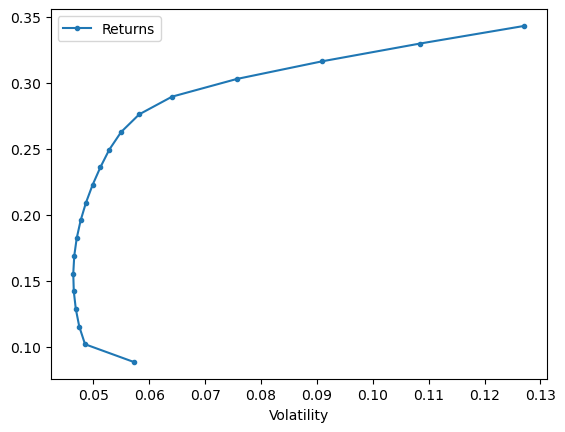

In [43]:
iml.plot_nA_effrontier(n_points=20, exp_rets=exp_ret[sectors], cov=cov.loc[sectors, sectors])

# Markowitz Procedure and Max Sharpe Ratio (MSR) Portfolio

In [44]:
iml.msr_portfolio(exp_ret[sectors], cov.loc[sectors, sectors], 0.03)

array([0.07160561, 0.        , 0.78761083, 0.14078356])

<Axes: xlabel='Volatility'>

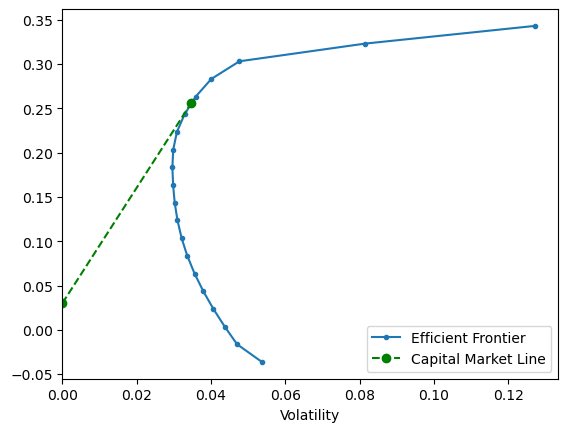

In [45]:
iml.plot_msr_portfolio(20, exp_ret, cov, risk_free_rate=0.03)

# Lack of Robustness in Markowitz Procedure and the GMV

How to estimate the expected returns ? - Problem!

Smallest changes in expected returns invoke dramatic changes in the MSR portfolio.

Solution: Target the Global Minimum Variance (GMV) Portfolio.

<Axes: xlabel='Volatility'>

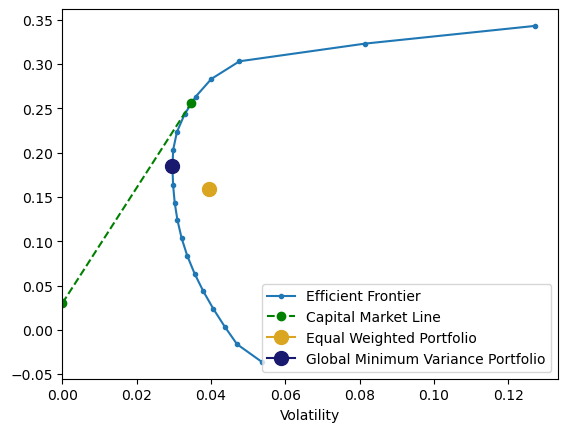

In [46]:
iml.plot_msr_ew_gmv(20, exp_ret, cov, risk_free_rate=0.03)

# Limits of Diversification

In [47]:
ind_return = iml.get_ind_returns()
ind_nfirms = iml.get_ind_nfirms()
ind_size = iml.get_ind_size()

d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\Investment_management_library.py:224: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv(r"D:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\data\ind30_m_vw_rets.csv",
d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\Investment_management_library.py:760: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv(r"D:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\data\ind30_m_nfirms.csv",
d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\Investment_management_library.py:745: UserWarning: Could not infer format,

In [48]:
print(ind_return.shape, ind_nfirms.shape, ind_size.shape)

(1110, 30) (1110, 30) (1110, 30)


In [49]:
ind_marketcap = ind_nfirms * ind_size

<Axes: >

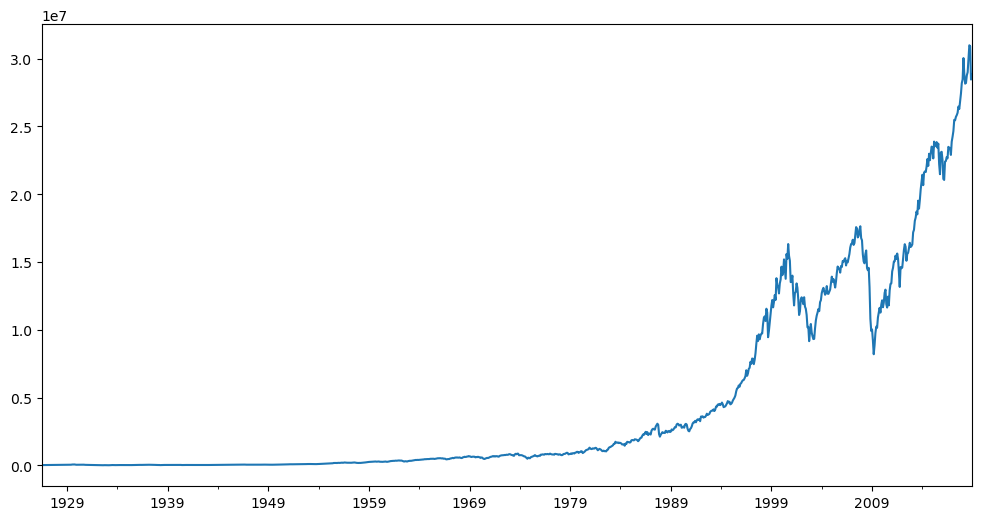

In [50]:
total_marketcap = ind_marketcap.sum(axis = 1)
total_marketcap.plot(figsize = (12, 6))

In [51]:
ind_capweight = ind_marketcap.divide(total_marketcap, axis = 0)
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


<Axes: >

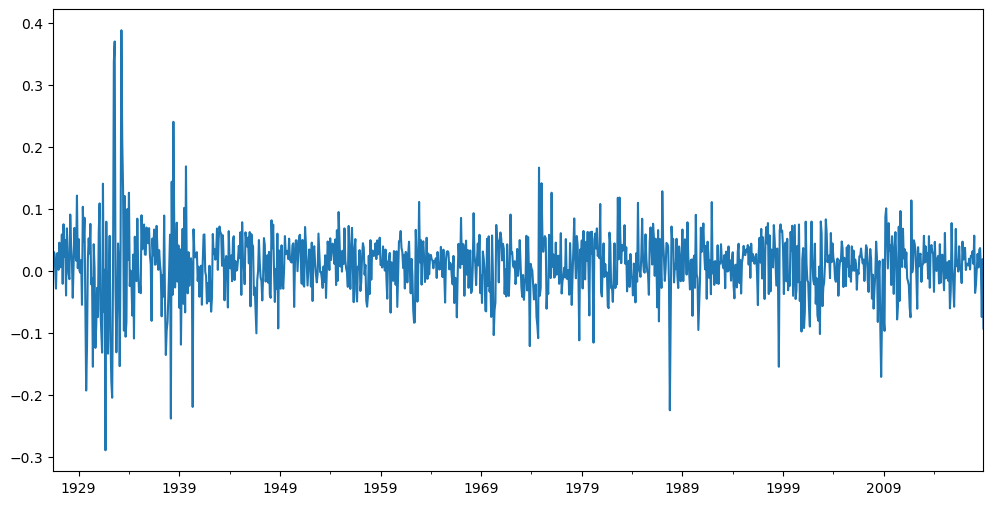

In [52]:
total_market_return = (ind_capweight * ind_return).sum(axis = 1) # Weighted average of returns
total_market_return.plot(figsize = (12, 6))

<Axes: title={'center': 'Total Market Cap Weighted Index 1926-2018'}>

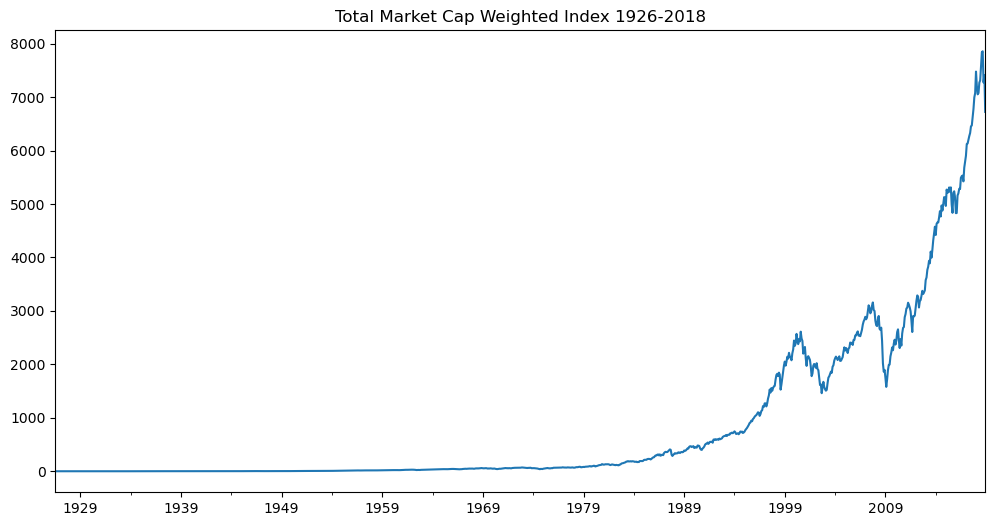

In [53]:
total_market_index = iml.drawdown(total_market_return).Wealth
total_market_index.plot(figsize = (12, 6), title = "Total Market Cap Weighted Index 1926-2018")

<Axes: title={'center': 'Total Market Cap Weighted Index 1980-2018'}>

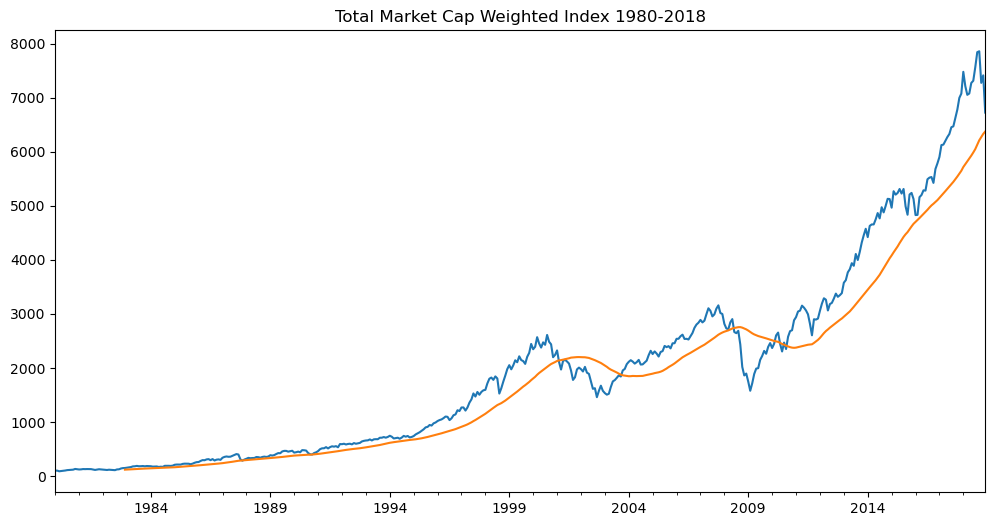

In [54]:
total_market_index["1980":].plot(figsize = (12, 6), title = "Total Market Cap Weighted Index 1980-2018")
total_market_index["1980":].rolling(window = 36).mean().plot(figsize = (12, 6), title = "Total Market Cap Weighted Index 1980-2018")

<Axes: >

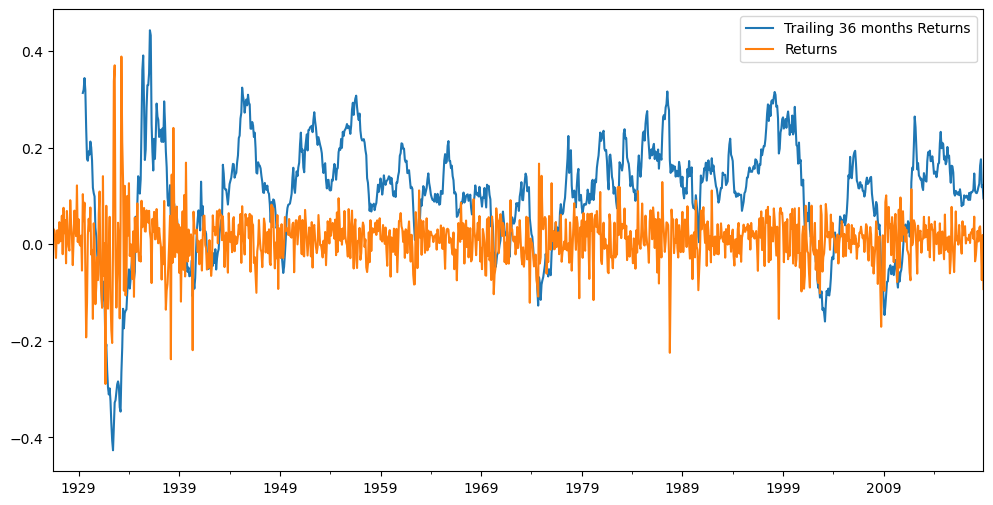

In [55]:
tmi_tr36rets = total_market_return.rolling(window = 36).aggregate(iml.annualized_returns, periods_per_year = 12)
tmi_tr36rets.plot(figsize = (12, 6), label = "Trailing 36 months Returns", legend = True)
total_market_return.plot(label = "Returns", legend = True)

# Rolling correlation - with Multiindices and .groupby

<Axes: title={'center': 'Trailing 36 months average correlation'}, xlabel='date'>

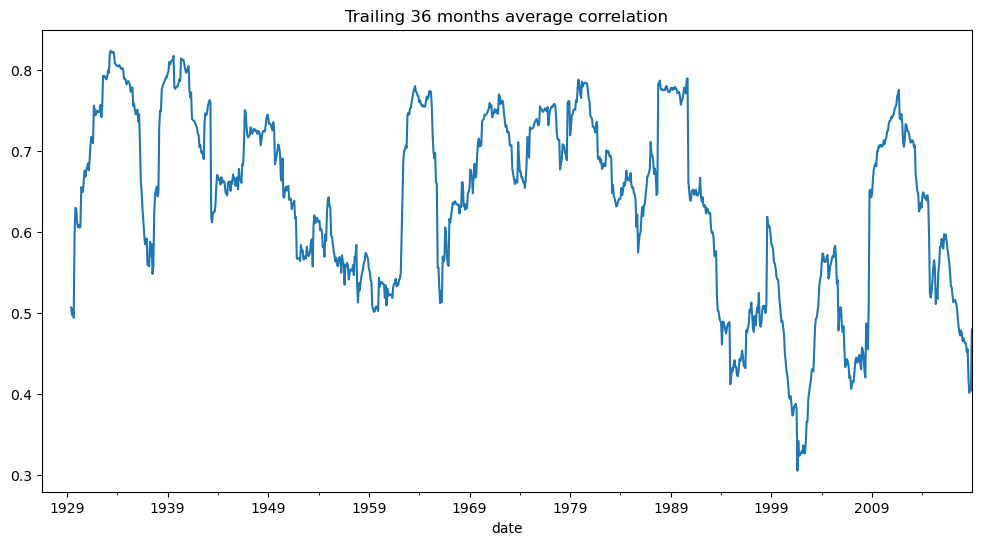

In [56]:
ts_corr = ind_return.rolling(window = 36).corr()
ts_corr.index.names = ['date', 'industry']


tmi_tr36corr = ts_corr.groupby(level = 'date').apply(lambda cormat: cormat.values.mean())
tmi_tr36corr.plot(figsize = (12, 6), title = "Trailing 36 months average correlation", legend = False)

Correlations increase when markets are crashing. Diversification is helpless.

<Axes: >

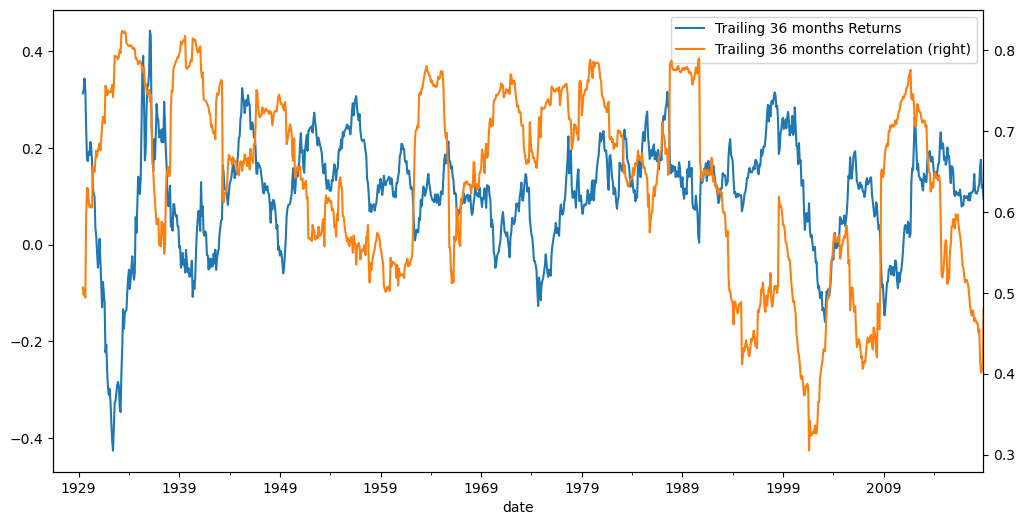

In [57]:
tmi_tr36rets.plot(label = "Trailing 36 months Returns", legend = True, figsize = (12, 6))
tmi_tr36corr.plot(label = "Trailing 36 months correlation", legend = True, secondary_y = True)

# CPPI and drawdown constraints

In [58]:
risky_assets_r = ind_return["2000":][["Steel", "Fin", "Beer"]]
safe_assets_r = pd.DataFrame().reindex_like(risky_assets_r)
safe_assets_r[:] = 0.03 / 12 # Risk free rate is 3% annually


In [59]:
start = 100
floor = 0.8
m = 3
account_value = start
floor_value = start * floor

Cushion = Asset value - Floor value  
Allocation to risky assets = m * Cushion

# Backtest CPPI

<Axes: title={'center': 'CPPI Risky Allocation'}>

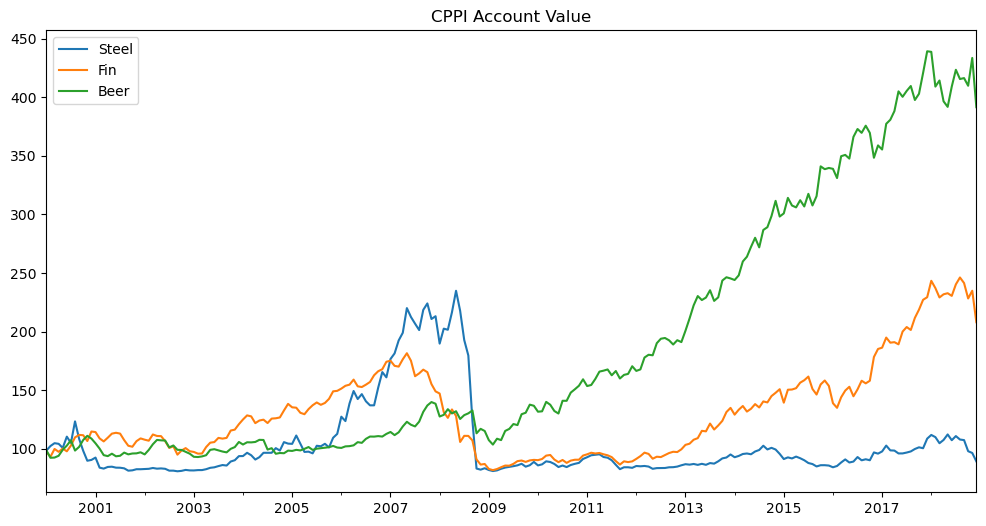

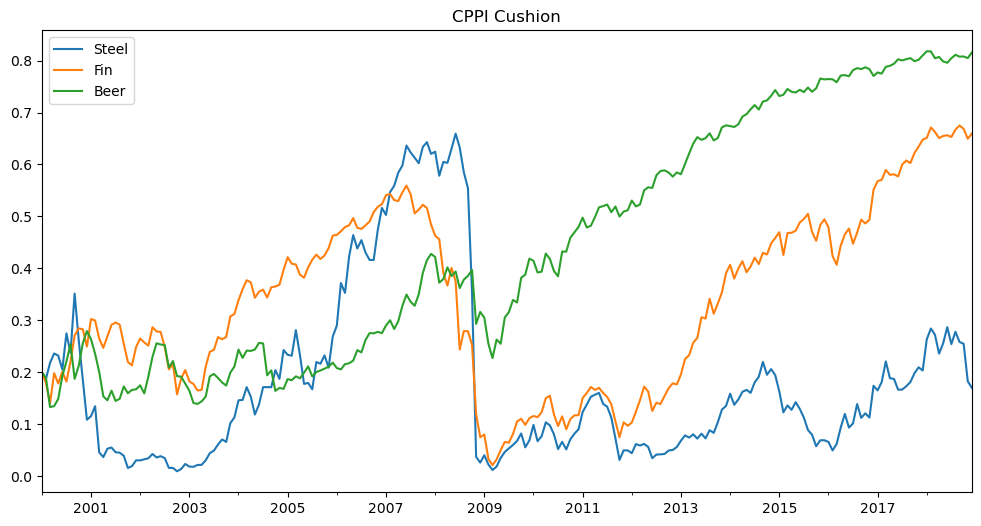

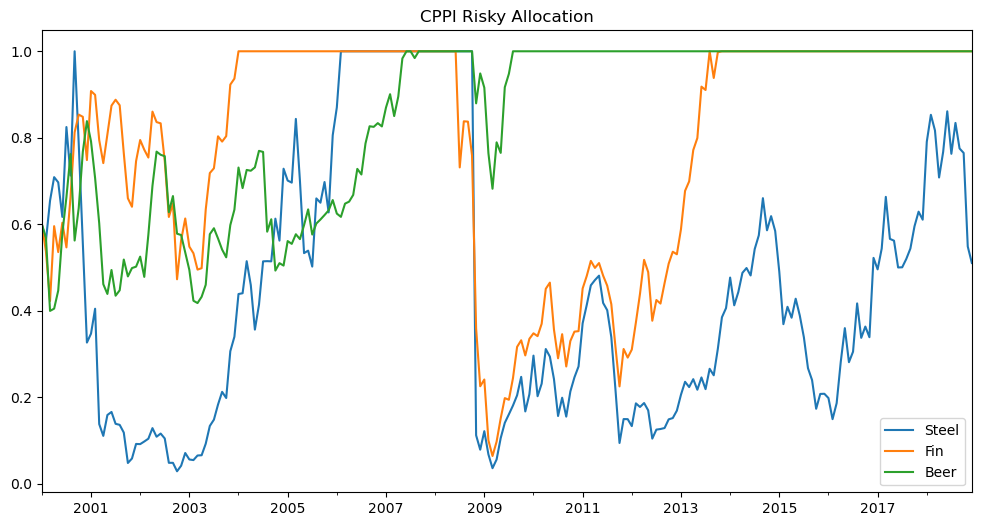

In [60]:
dates = risky_assets_r.index
n_steps = len(dates)
m = 3
account_history = pd.DataFrame().reindex_like(risky_assets_r)
cushion_history = pd.DataFrame().reindex_like(risky_assets_r)
risky_w_history = pd.DataFrame().reindex_like(risky_assets_r)

for step in range(n_steps):
    cushion = (account_value - floor_value) / account_value
    risky_w = m * cushion
    risky_w = np.minimum(risky_w, 1) # No leverage, upper bound of 100%
    risky_w = np.maximum(risky_w, 0) # No shorting, lower bound of 0%
    safe_w = 1 - risky_w
    risky_alloc = account_value * risky_w
    safe_alloc = account_value * safe_w
    account_value = risky_alloc * (1 + risky_assets_r.iloc[step]) + safe_alloc * (1 + safe_assets_r.iloc[step])
    cushion_history.iloc[step] = cushion
    account_history.iloc[step] = account_value
    risky_w_history.iloc[step] = risky_w 
    
account_history.plot(figsize = (12, 6), title = "CPPI Account Value")
cushion_history.plot(figsize = (12, 6), title = "CPPI Cushion")
risky_w_history.plot(figsize = (12, 6), title = "CPPI Risky Allocation")



<Axes: >

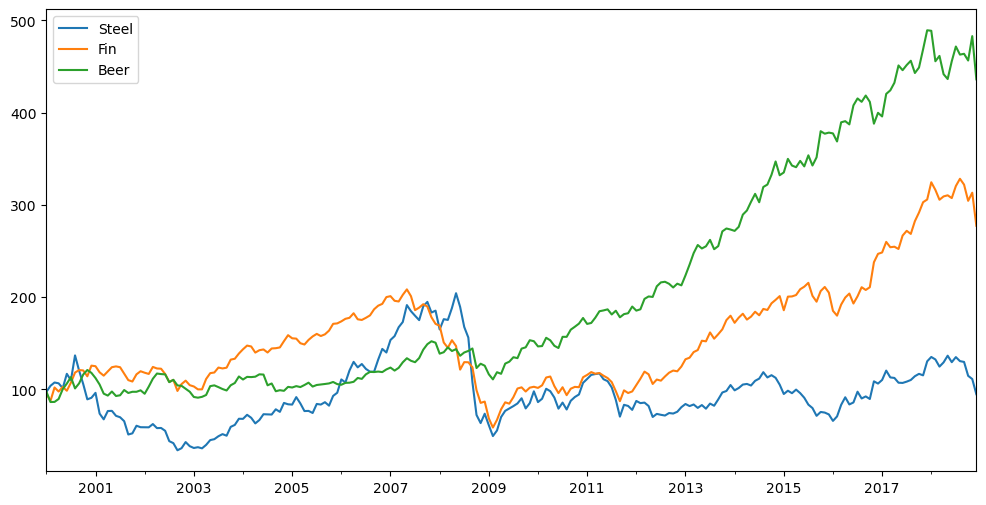

In [61]:
risky_wealth = start * (1 + risky_assets_r).cumprod()
risky_wealth.plot(figsize = (12, 6), label = "Risky Wealth", legend = True)

In [62]:
iml.summary_stats(risky_assets_r)

,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
Steel,-0.002790,0.311682,-0.105203,-0.758017,-0.326334,4.144381,0.150139,0.208117
Fin,0.055166,0.192485,0.130743,-0.718465,-0.533218,4.995534,0.091224,0.132175
Beer,0.080598,0.138620,0.365015,-0.271368,-0.493545,4.173881,0.063015,0.091442


<Axes: >

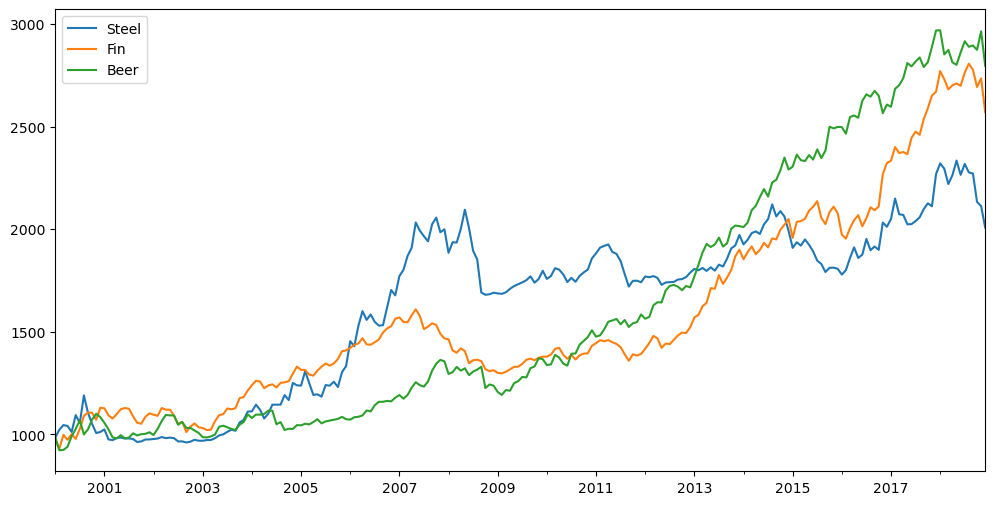

In [63]:
backtest_results = iml.run_cppi(risky_assets_r)

backtest_results["Wealth"].plot(figsize = (12, 6), legend = True)

In [64]:
iml.summary_stats(backtest_results["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
Steel,0.038389,0.096913,0.086558,-0.197943,0.494924,5.187552,0.037186,0.054438
Fin,0.052602,0.073411,0.307888,-0.193668,-0.088573,3.768008,0.030554,0.042077
Beer,0.056568,0.072351,0.367215,-0.125096,-0.746848,4.576511,0.033089,0.048819


<Axes: >

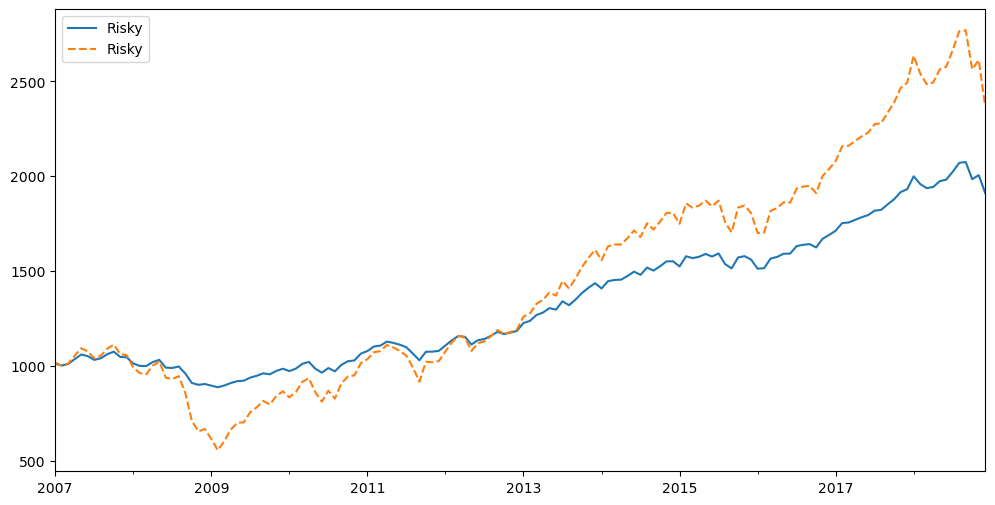

In [65]:
backtest_results = iml.run_cppi(total_market_return["2007":])   
ax = backtest_results["Wealth"].plot(figsize = (12, 6))
backtest_results["Risky Wealth"].plot(ax = ax, style = "--")


In [66]:
iml.summary_stats(backtest_results["Risky Wealth"].pct_change().dropna())


,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
Risky,0.073411,0.149936,0.289531,-0.499943,-0.734939,4.523488,0.071592,0.096315


In [67]:
iml.summary_stats(backtest_results["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
Risky,0.05482,0.065896,0.376659,-0.174311,-0.674862,3.236155,0.030046,0.040605


# With Drawdown constraint

<Axes: >

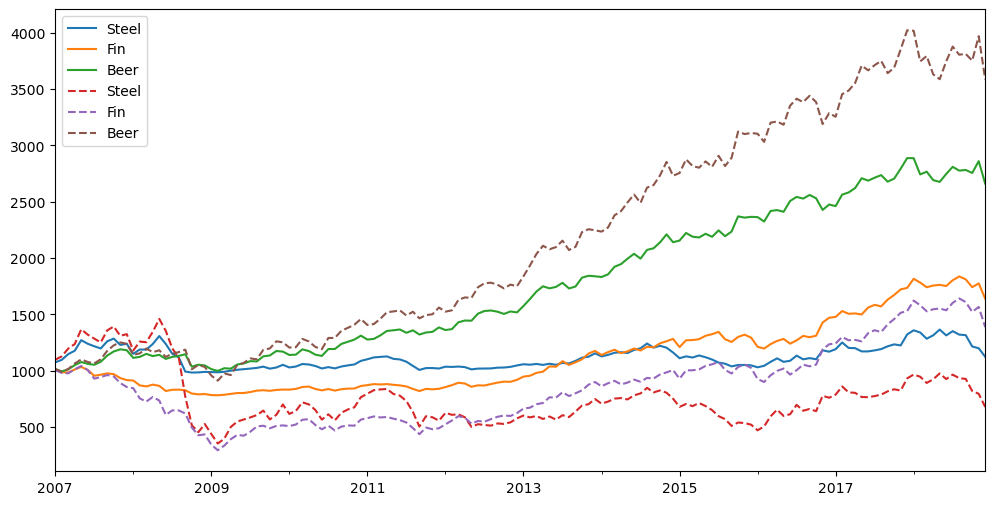

In [68]:
backtest_results = iml.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown = 0.25)
ax = backtest_results["Wealth"].plot(figsize = (12, 6))
backtest_results["Risky Wealth"].plot(ax = ax, style = "--")

In [69]:
iml.summary_stats(backtest_results["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
Steel,-0.039660,0.305334,-0.228143,-0.758017,-0.459951,4.782828,0.152288,0.203837
Fin,0.027364,0.211461,-0.012466,-0.718465,-0.695200,4.621401,0.105744,0.149862
Beer,0.111554,0.127523,0.639526,-0.271368,-0.670797,4.650878,0.056497,0.077388


In [70]:
iml.summary_stats(backtest_results["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
Steel,0.003784,0.096733,-0.271015,-0.248059,-0.441089,5.220481,0.047371,0.066991
Fin,0.041975,0.084731,0.141328,-0.243626,-0.355163,4.153860,0.038342,0.054111
Beer,0.084375,0.085961,0.632555,-0.161186,-0.744111,4.571533,0.037937,0.051189


# Random Walk generation

<Axes: >

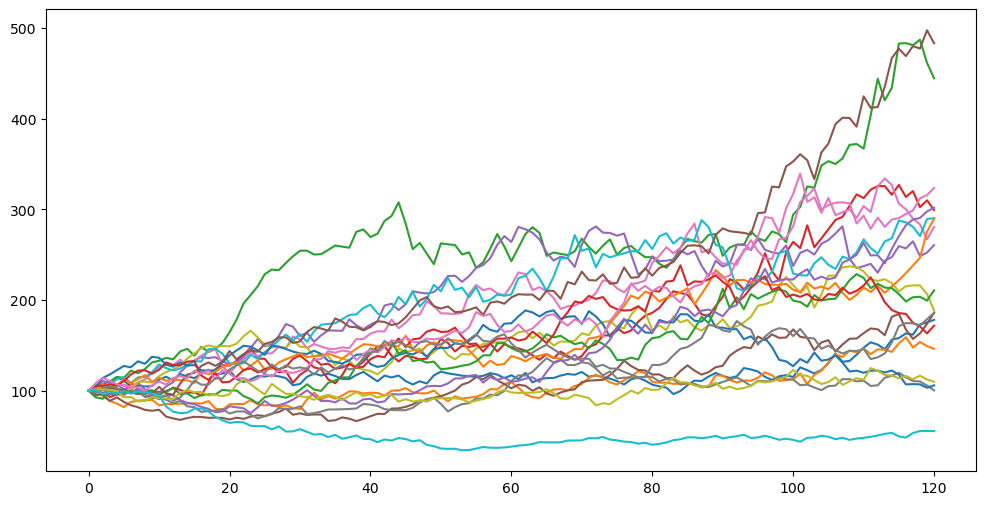

In [71]:
n_years = 10
n_scenarios = 20
iml.gbm(n_years=n_years, n_scenarios=n_scenarios).plot(legend = False, figsize = (12, 6))

# Interactive plots and MC simulations of CPPI

<Axes: >

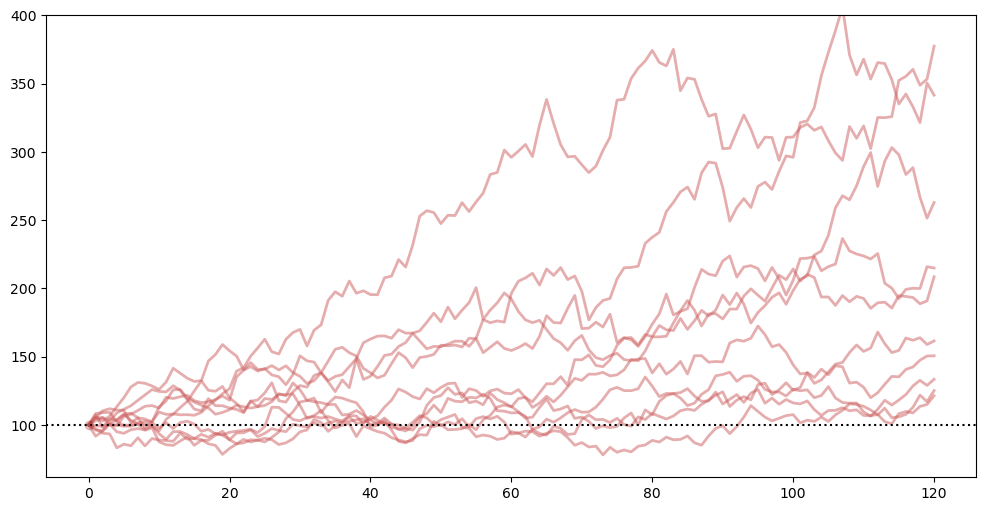

In [72]:
iml.show_gbm(n_scenarios=10, mu=0.07, sigma=0.15)

In [73]:
gbm_controls = widgets.interactive(iml.show_gbm, n_scenarios = (1, 20, 1), mu = (0, 0.2, 0.01), sigma = (0, 0.3, 0.01))
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.1, de…

In [74]:
cppi_controls = widgets.interactive(iml.show_cppi, n_scenarios = widgets.IntSlider(min = 1, max = 1000, step = 5, value = 50), mu = (0, 0.2, 0.01), sigma = (0, 0.3, 0.01), floor = (0, 2, 0.1), m = (1, 5, 0.5), risk_free_rate = (0, 0.05, 0.01), y_max = widgets.IntSlider(min = 0, max = 100, step = 1, value = 100), description = "Zoom Y Axis")
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [75]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., risk_free_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = iml.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = iml.run_cppi(risky_r=pd.DataFrame(risky_r),risk_free_rate=risk_free_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)

cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

# Present values, liabilities, and Funding ratio

In [76]:
liabilities = pd.Series(data=[0, 100000, 200000, 300000], index=[0, 1, 2, 3])
liabilities

0         0
1    100000
2    200000
3    300000
dtype: int64

In [78]:
interest_rate = 0.03
present_value = iml.present_value(liabilities, interest_rate)
present_value


560149.0582734755

In [79]:
assets = 500000
surplus = assets - present_value
funding_ratio = iml.funding_ratio(assets, liabilities, interest_rate)
print("Funding ratio = ", funding_ratio)
print("Surplus = ", surplus)

Funding ratio =  0.892619549412668
Surplus =  -60149.0582734755


In [80]:
interest_rate = 0.04
print("Funding ratio with r = 0.04 is ", iml.funding_ratio(assets, liabilities, interest_rate))
interest_rate = 0.02
print("Funding ratio with r = 0.02 is ", iml.funding_ratio(assets, liabilities, interest_rate))

Funding ratio with r = 0.04 is  0.9128018696442484
Funding ratio with r = 0.02 is  0.8726465364120783


In [84]:
iml.ann_to_inst(0.06)

0.05826890812397577

# Cox-Ingersoll-Ross (CIR) Model

<Axes: >

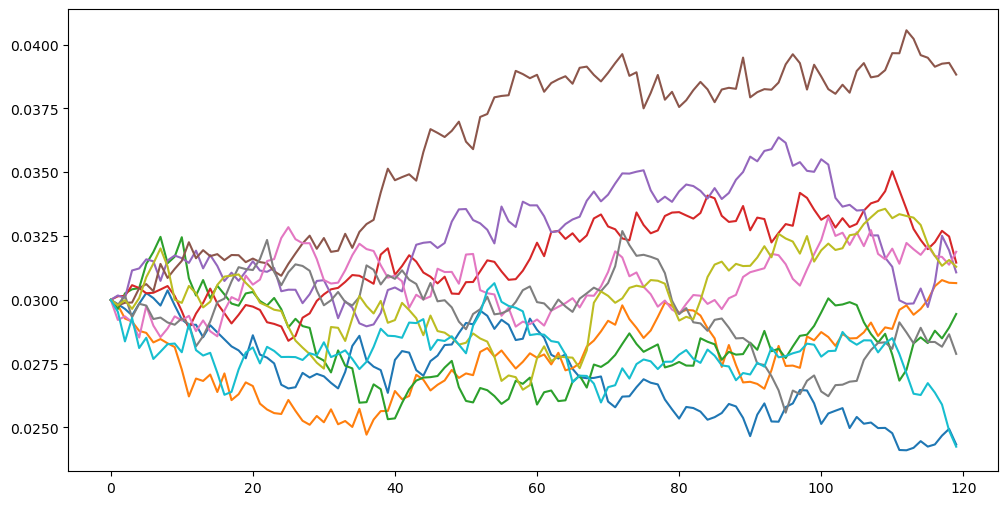

In [107]:
iml.cir(n_years=10, n_scenarios=10, a=0.05, b=0.03, r_0=0.03, sigma=0.01).plot(legend=False, figsize=(12, 6))

In [108]:
controls = widgets.interactive(iml.show_cir, n_scenarios = (1, 100, 1), a = (0, 1, 0.1), b = (0, 0.15, 0.01), r_0 = (0, 0.5, 0.01), sigma = (0, 0.1, 0.01))
display(controls)   

interactive(children=(IntSlider(value=5, description='n_scenarios', min=1), FloatSlider(value=0.05, descriptio…

In [111]:
controls = widgets.interactive(iml.show_cir_prices, n_scenarios = (1, 100, 1), a = (0, 1, 0.1), b = (0, 0.15, 0.01), r_0 = (0, 0.5, 0.01), sigma = (0, 0.1, 0.01))
display(controls)

interactive(children=(IntSlider(value=5, description='n_scenarios', min=1), FloatSlider(value=0.05, descriptio…

In [116]:
a_0 = 0.75
rates, bond_prices = iml.cir_prices(n_years=10, r_0=0.03, b=0.03, n_scenarios=10)
liabilities = bond_prices # The trick
zcbond_10 = pd.Series(data = [1], index = [10])
zc_0 = iml.present_value(zcbond_10, r = 0.03)
n_bonds = a_0 / zc_0
av_zc_bonds = n_bonds * bond_prices

av_cash = a_0 * (rates / 12 + 1).cumprod()



<Axes: >

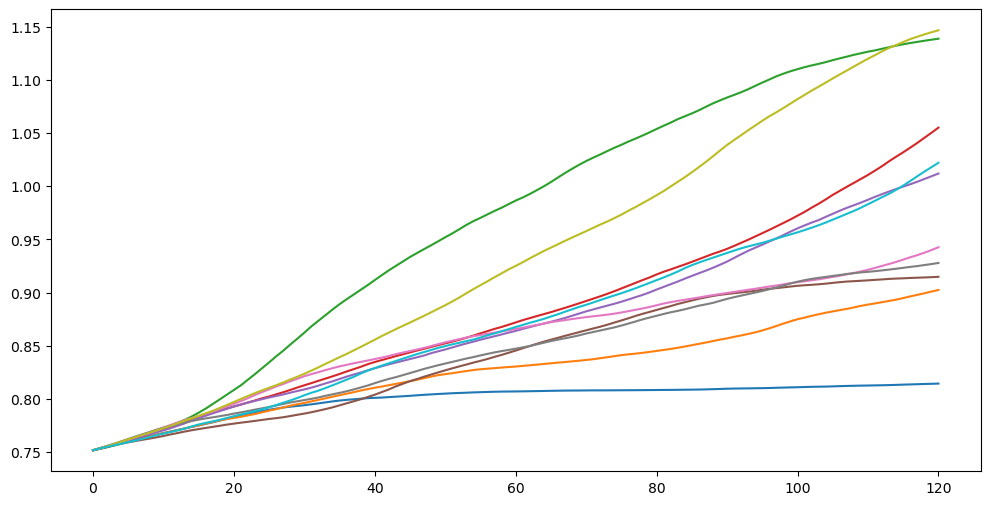

In [117]:
av_cash.plot(legend = False, figsize = (12, 6))

<Axes: >

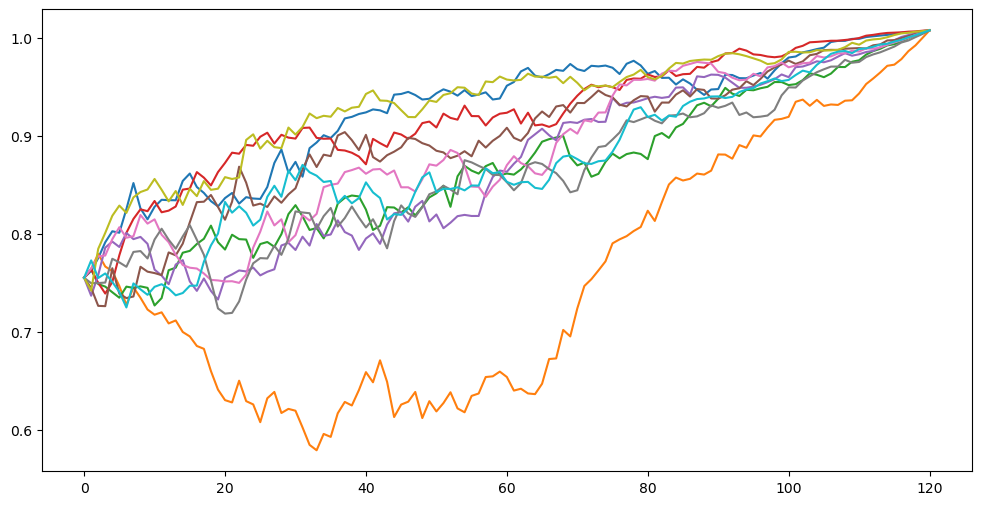

In [115]:
av_zc_bonds.plot(legend = False, figsize = (12, 6))

<Axes: title={'center': 'Returns of funding ratio with cash'}>

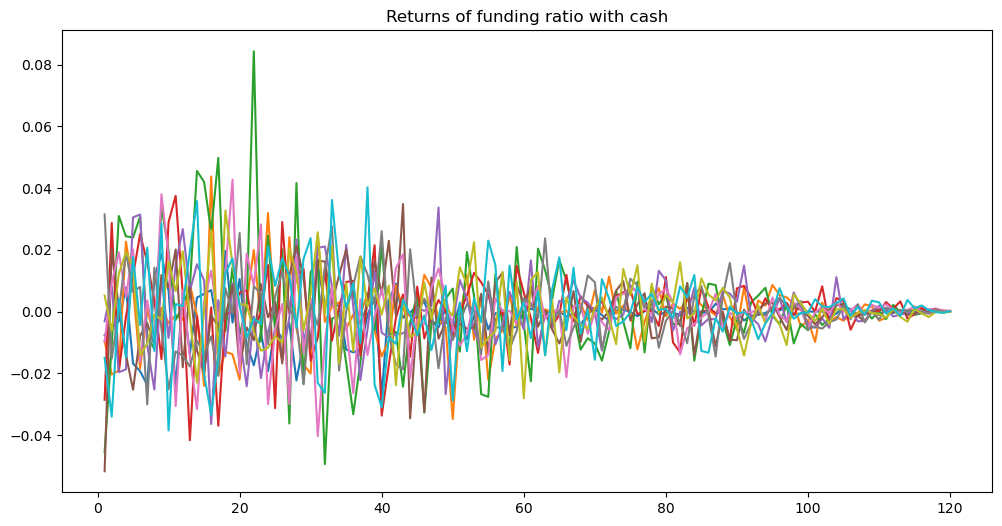

In [118]:
(av_cash/liabilities).pct_change().plot(title = "Returns of funding ratio with cash", legend = False, figsize = (12, 6))

<Axes: title={'center': 'Returns of funding ratio with zero coupon bonds'}>

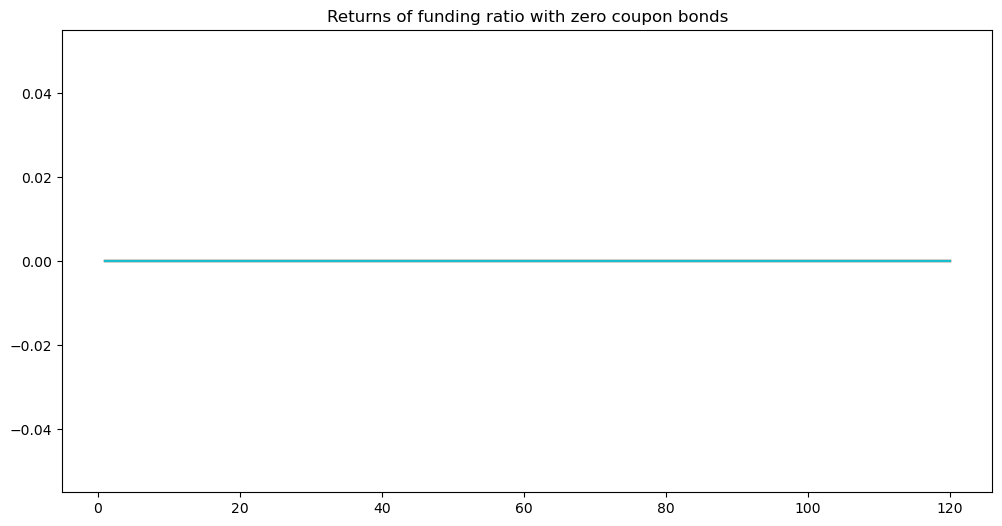

In [121]:
(av_zc_bonds/liabilities).pct_change().plot(title = "Returns of funding ratio with zero coupon bonds", legend = False, figsize = (12, 6))

Terminal funding ratio

In [122]:
av_0 = 0.75
rates, bond_prices = iml.cir_prices(n_years=10, r_0=0.03, b=0.03, n_scenarios=10000)
liabilities = bond_prices # The trick
zc_0 = iml.present_value(zcbond_10, r = 0.03)
n_bonds = av_0 / zc_0
av_zc_bonds = n_bonds * bond_prices

av_cash = av_0 * (rates / 12 + 1).cumprod()



<Axes: >

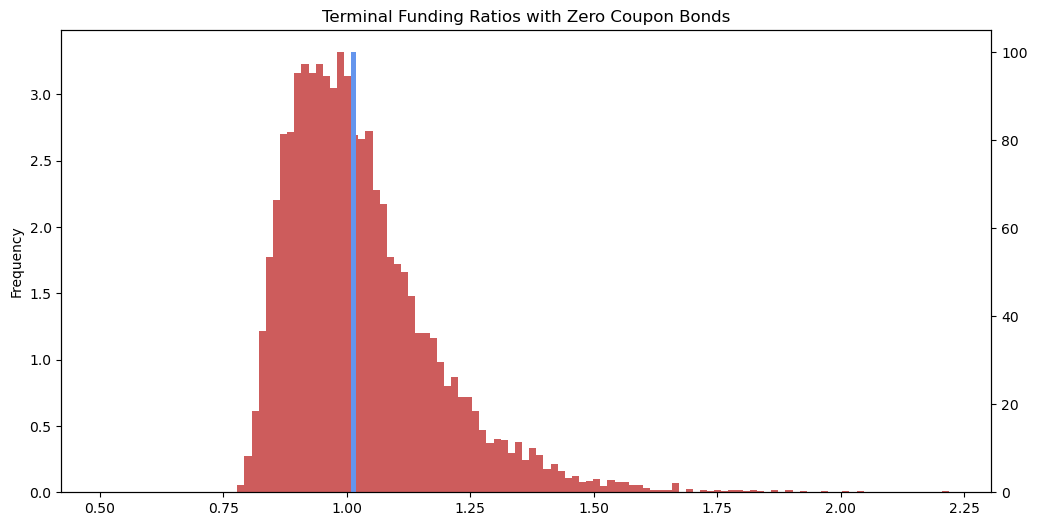

In [124]:
tfr_cash = av_cash.iloc[-1] / liabilities.iloc[-1]
tfr_zc_bonds = av_zc_bonds.iloc[-1] / liabilities.iloc[-1]

tfr_cash.plot(kind = "hist", label = "Cash", figsize = (12, 6), bins = 100, title = "Terminal Funding Ratios with Cash", density = True, color = "indianred")
tfr_zc_bonds.plot(kind = "hist", label = "Bonds", figsize = (12, 6), bins = 100, title = "Terminal Funding Ratios with Zero Coupon Bonds", density = True, color = "cornflowerblue", secondary_y = True)    

# GHP Construction with Duration Matching

In [89]:
iml.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [90]:
iml.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

In [91]:
iml.bond_price(20, 1000, 0.05, 2, 0.05)

1000.0000000000025

In [92]:
rates = np.linspace(0.01, 0.1, 20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [93]:
bond_prices = [iml.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
bond_prices

[1379.7483829333994,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727874,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089514,
 1016.5739967228162,
 979.7406048086302,
 944.5154728963503,
 910.8222676519945,
 878.5884967212595,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465676,
 737.0181469646424,
 712.2095315367839,
 688.4447414365]

<Axes: title={'center': 'Price of 10 year bond with different interest rates'}>

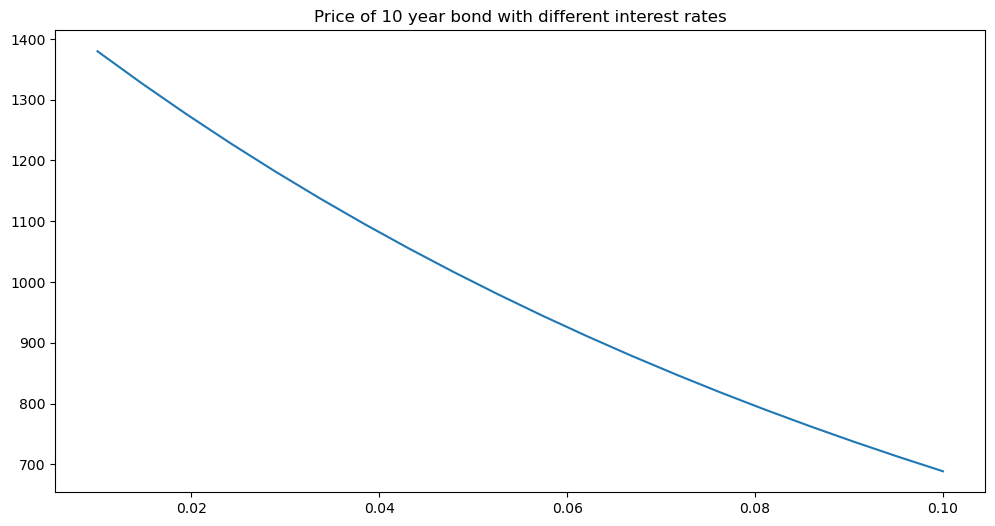

In [94]:
pd.DataFrame(data = bond_prices, index = rates).plot(title = "Price of 10 year bond with different interest rates", legend = False, figsize = (12, 6))  

In [95]:
iml.macaulay_duration(iml.bond_cash_flows(3, 1000, 0.06, 2), 0.06/2)

5.579707187194534

If the Macaulay Duration of the liabilities is equal to that of the bonds, then the sensitivities to interest rates are the same. 

Works for yield-curve shift, but other behaviors of yield curve like, change in curvature or change in slope need to be accounted for. 

# Duration matching

In [96]:
liabilities = pd.Series(data=[100000, 100000], index=[10, 12])
iml.macaulay_duration(liabilities, 0.04)


10.960799385088393

In [97]:
# Assuming we have access to only 10-year and 20-year bonds
md_10 = iml.macaulay_duration(iml.bond_cash_flows(10, 1000, 0.05, 1), 0.04)
md_20 = iml.macaulay_duration(iml.bond_cash_flows(20, 1000, 0.05, 1), 0.04)
md_10, md_20

(8.190898824083233, 13.544718122145921)

Portfolio weights will be equal to the weights that create equal macaulay duration.

In [98]:
w_md_10 = iml.match_durations(liabilities, iml.bond_cash_flows(10, 1000, 0.05, 1), iml.bond_cash_flows(20, 1000, 0.05, 1), 0.04)
w_md_20 = 1 - w_md_10
w_md_10, w_md_20

(0.48263092069478974, 0.5173690793052103)

In [101]:
price_w_md_10 = iml.bond_price(10, 1000, 0.05, 1, 0.04) 
price_w_md_20 = iml.bond_price(20, 1000, 0.05, 1, 0.04)
bond_md_10 = iml.bond_cash_flows(10, 1000, 0.05, 1)
bond_md_20 = iml.bond_cash_flows(20, 1000, 0.05, 1)
a_0 = 130000
p_flows = pd.concat([a_0*w_md_10*bond_md_10/price_w_md_10, a_0*w_md_20*bond_md_20/price_w_md_20])
iml.macaulay_duration(p_flows, 0.04)

10.960799385088393

In [102]:
current_funding_ratio = iml.funding_ratio(p_flows, liabilities, 0.04)
current_funding_ratio

0.9998760012192478

<Axes: title={'center': 'Change in funding ratio as interest rates change'}>

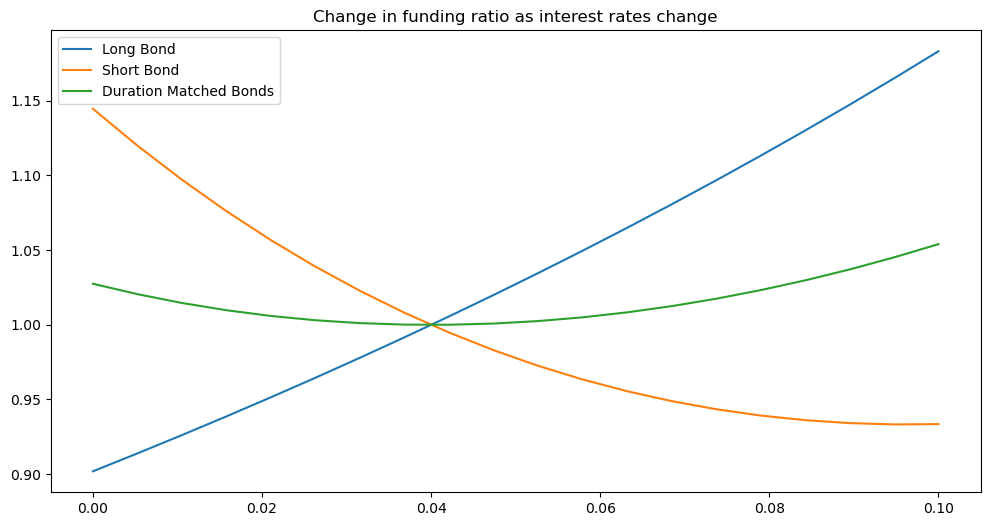

In [104]:
rates = np.linspace(0, 0.1, 20)
lb_assets = a_0*bond_md_10/price_w_md_10
sb_assets = a_0*bond_md_20/price_w_md_20
fr_change = pd.DataFrame({
    "Long Bond": [iml.funding_ratio(lb_assets, liabilities, r) for r in rates],
    "Short Bond": [iml.funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds": [iml.funding_ratio(p_flows, liabilities, r) for r in rates]}, index=rates)
fr_change.plot(title = "Change in funding ratio as interest rates change", figsize = (12, 6))


# MC Simulation of prices of coupon-bearing bonds using CIR

In [162]:
import edhec_risk_kit_129 as erk

d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\edhec_risk_kit_129.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\edhec_risk_kit_129.py:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\edhec_risk_kit_129.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [174]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [175]:
rates, zc_prices = erk.cir(10, 500, b = 0.03, r_0 = 0.03)
rates.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.028959,0.032833,0.026047,0.026915,0.028439,0.030514,0.032028,0.027341,0.025867,0.030284,...,0.026893,0.026909,0.029884,0.031843,0.028353,0.029821,0.027983,0.033361,0.029596,0.028344
2,0.026880,0.031228,0.027611,0.027946,0.026810,0.024819,0.036159,0.029395,0.026519,0.036267,...,0.023948,0.028772,0.034907,0.028612,0.028345,0.032246,0.029262,0.031470,0.031704,0.023964
3,0.022377,0.033363,0.023870,0.026088,0.024286,0.030433,0.038215,0.028855,0.025823,0.037183,...,0.024752,0.027115,0.037595,0.028848,0.023804,0.036195,0.029095,0.031159,0.035135,0.023838
4,0.023780,0.032499,0.028015,0.024280,0.021820,0.031358,0.034467,0.027430,0.023855,0.039436,...,0.021518,0.026985,0.040985,0.033704,0.019559,0.036586,0.030761,0.034144,0.031178,0.024024


<Axes: title={'center': 'Price of a 5 year bond as interest rates change'}>

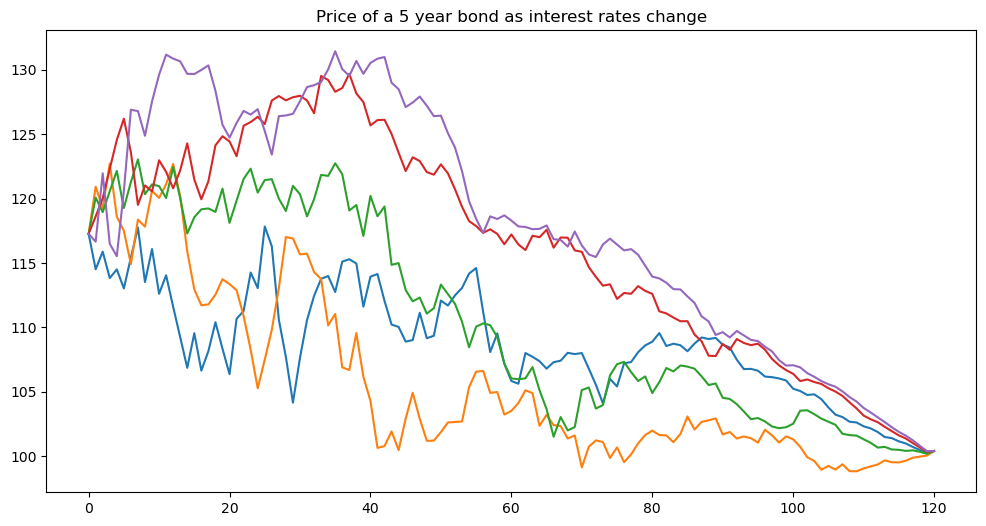

In [176]:
erk.bond_price(10, 100, 0.05, 12, rates[[1, 2, 3, 4, 5]]).plot(legend = False, figsize = (12, 6), title = "Price of a 5 year bond as interest rates change")

In [177]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1, 2, 3, 4, 5]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)


d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\edhec_risk_kit_129.py:635: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupon_rate/coupons_per_year


1    0.030937
2    0.032385
3     0.03029
4     0.02805
5    0.027424
dtype: object

In [178]:
prices_10 = erk.bond_price(10, 100, 0.05, 12, rates)
prices_10[[1, 2, 3, 4, 5]].tail()   # at maturity

,1,2,3,4,5
116,101.000009,99.664644,100.426868,101.383243,101.605204
117,100.727859,99.899358,100.46817,101.02628,101.239266
118,100.490993,99.985758,100.352754,100.685967,100.812211
119,100.226114,100.063528,100.199483,100.355179,100.404676
120,100.416667,100.416667,100.416667,100.416667,100.416667


In [179]:
prices_30 = erk.bond_price(30, 100, 0.05, 12, rates)
prices_30[[1, 2, 3, 4, 5]].tail()   # not yet matured

,1,2,3,4,5
116,150.353881,88.067493,118.406994,177.653659,196.151743
117,148.254597,95.006796,128.238255,176.164193,199.954344
118,148.767441,98.916723,132.476152,176.114552,197.049995
119,143.766477,110.336003,137.497292,179.604338,196.142644
120,137.852407,111.05863,139.524653,172.686036,195.62432


In [180]:
rets_30 = erk.bond_total_return(prices_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(prices_10, 100, 0.05, 12)
rets_bonds = 0.6*rets_10 + 0.4*rets_30 # Assuming rebalancing to 60-40 every month



d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\edhec_risk_kit_129.py:635: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupon_rate/coupons_per_year


In [181]:
mean_rets_bonds = rets_bonds.mean(axis = "columns") # Converting to a single time-series - average return of the portfolio
erk.summary_stats(pd.DataFrame(mean_rets_bonds))


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036057,0.003991,0.479135,3.860382,-0.001251,-0.000611,1.477236,0.0


In [184]:
price_eq = erk.gbm(n_years = 10, n_scenarios = 500, mu = 0.07, sigma = 0.15)
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape, rets_bonds.shape

((120, 500), (120, 500))

Creating 70-30 mix portfolio

In [185]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis = "columns")
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.058184,0.0047,0.057949,2.632322,-0.002515,-0.002057,5.836056,0.0


# Naive risk budgeting strategies between PSP and GHP

In [186]:
rates, zc_prices = erk.cir(10, 500, b = 0.03, r_0 = 0.03)
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator = erk.fixedmix_allocator, w1 = 0.6)
mean_rets_bonds = rets_bonds.mean(axis = "columns")
erk.summary_stats(pd.DataFrame(mean_rets_bonds))


d:\UvA VU\Investment Management with Python and ML\notebooks_and_codem01_v02\edhec_risk_kit_129.py:635: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4166666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupon_rate/coupons_per_year


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.03601,0.003934,-0.086475,2.848404,-0.001062,-0.000504,1.486899,-0.000132


In [200]:
price_eq = erk.gbm(n_years = 10, n_scenarios = 500, mu = 0.07, sigma = 0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator = erk.fixedmix_allocator, w1 = 0.7)
rets_7030b_mean = rets_7030b.mean(axis = "columns")
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.061886,0.0046,0.531118,3.150286,-0.003053,-0.002772,6.747005,0.0


In [202]:
summaries = erk.summary_stats(rets_7030b)
summaries.mean() 

Annualized Return          0.056410
Annualized Vol             0.107154
Skewness                  -0.000599
Kurtosis                   2.985080
Cornish-Fisher VaR (5%)    0.045629
Historic CVaR (5%)         0.057902
Sharpe Ratio               0.241772
Max Drawdown              -0.204762
dtype: float64

In [203]:
pd.concat([erk.terminal_stats(rets_bonds, name = "FI"), 
           erk.terminal_stats(rets_eq, name = "EQ"), 
           erk.terminal_stats(rets_7030b, name = "70/30")], 
          axis = 1)

,FI,EQ,70/30
mean,1.386113,2.018163,1.816123
std,0.112381,0.996840,0.612923
p_breach,NaN,0.034000,0.014000
e_short,NaN,0.153158,0.080907
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


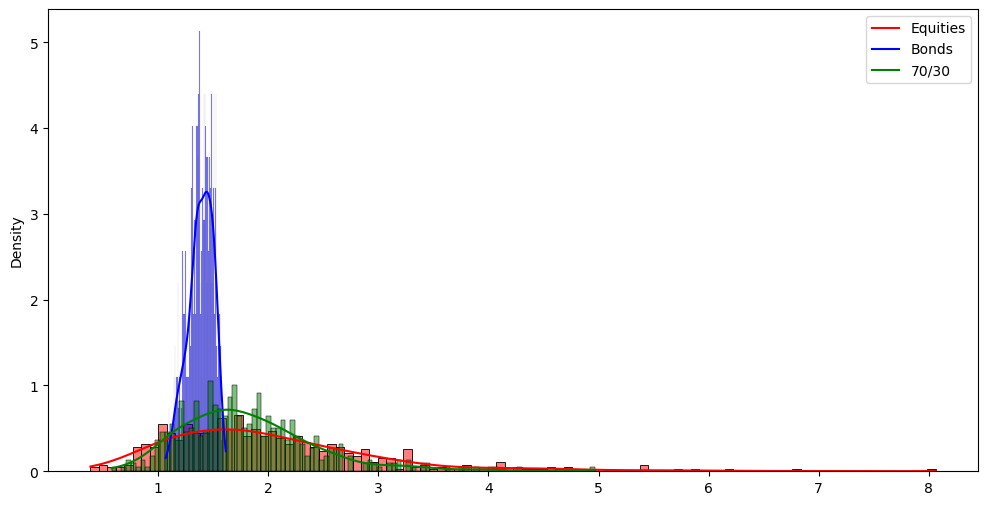

In [211]:
plt.figure(figsize= (12, 6))
sns.histplot(erk.terminal_values(rets_eq), color = "red", bins = 100, kde=True, stat="density")
sns.histplot(erk.terminal_values(rets_bonds), color = "blue", bins = 100, kde=True, stat="density")
sns.histplot(erk.terminal_values(rets_7030b), color = "green", bins = 100, kde=True, stat="density")
plt.legend(["Equities", "Bonds", "70/30"])

In [214]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator = erk.glidepath_allocator, start_glide = 0.8, end_glide = 0.2)
pd.concat([erk.terminal_stats(rets_bonds, name = "FI"),
            erk.terminal_stats(rets_eq, name = "EQ"),
            erk.terminal_stats(rets_7030b, name = "70/30"),
            erk.terminal_stats(rets_g8020, name = "Glide 80/20"),
            ], axis = 1)

,FI,EQ,70/30,Glide 80/20
mean,1.386113,2.018163,1.816123,1.683905
std,0.112381,0.996840,0.612923,0.430470
p_breach,NaN,0.034000,0.014000,0.002000
e_short,NaN,0.153158,0.080907,0.171933
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


# Dynamic risk budgeting

In [219]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios = n_scenarios, b = 0.03, r_0 = 0.03)
price_eq = erk.gbm(n_years = 10, n_scenarios = n_scenarios, mu = 0.07, sigma = 0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator = erk.fixedmix_allocator, w1 = 0.7)
pd.concat([erk.terminal_stats(rets_bonds, name = "FI", floor = 0.75),
            erk.terminal_stats(rets_eq, name = "EQ", floor = 0.75),
            erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75),
            ], axis = 1)

,FI,EQ,70/30
mean,1.386113,1.954921,1.746090
std,0.112381,0.975452,0.595178
p_breach,NaN,0.039000,0.010400
e_short,NaN,0.129236,0.089110
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [221]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator = erk.floor_allocator, floor = 0.75, zc_prices = zc_prices[1:])
pd.concat([erk.terminal_stats(rets_bonds, name = "FI", floor = 0.75),
            erk.terminal_stats(rets_eq, name = "EQ", floor = 0.75),
            erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75),
            erk.terminal_stats(rets_floor75, name = "Floor 75", floor = 0.75),
            ], axis = 1).round(2)

,FI,EQ,70/30,Floor 75
mean,1.39,1.95,1.75,1.93
std,0.11,0.98,0.60,0.98
p_breach,NaN,0.04,0.01,NaN
e_short,NaN,0.13,0.09,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [222]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator = erk.floor_allocator, floor = 0.75, zc_prices = zc_prices[1:], m = 1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator = erk.floor_allocator, floor = 0.75, zc_prices = zc_prices[1:], m = 5)
pd.concat([erk.terminal_stats(rets_bonds, name = "FI", floor = 0.75),
            erk.terminal_stats(rets_eq, name = "EQ", floor = 0.75),
            erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75),
            erk.terminal_stats(rets_floor75, name = "Floor 75", floor = 0.75),
            erk.terminal_stats(rets_floor75m1, name = "Floor 75 m1", floor = 0.75),
            erk.terminal_stats(rets_floor75m5, name = "Floor 75 m5", floor = 0.75),
            ], axis = 1).round(2)

,FI,EQ,70/30,Floor 75,Floor 75 m1,Floor 75 m5
mean,1.39,1.95,1.75,1.93,1.62,1.94
std,0.11,0.98,0.60,0.98,0.43,0.98
p_breach,NaN,0.04,0.01,NaN,NaN,0.00
e_short,NaN,0.13,0.09,NaN,NaN,0.00
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


# Risk budgeting with drawdown constraint

In [223]:
cashrate = 0.02
monthly_cashreturn = (1 + cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data = monthly_cashreturn, index = rets_eq.index, columns = rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator = erk.drawdown_allocator, maxdd = 0.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)
pd.concat([erk.terminal_stats(rets_bonds, name = "FI", floor = 0.75),
            erk.terminal_stats(rets_eq, name = "EQ", floor = 0.75),
            erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75),
            erk.terminal_stats(rets_floor75, name = "Floor 75", floor = 0.75),
            erk.terminal_stats(rets_floor75m1, name = "Floor 75 m1", floor = 0.75),
            erk.terminal_stats(rets_floor75m5, name = "Floor 75 m5", floor = 0.75),
            erk.terminal_stats(rets_maxdd25, name = "MaxDD 25", floor = 0.75),
            ], axis = 1).round(2)

,FI,EQ,70/30,Floor 75,Floor 75 m1,Floor 75 m5,MaxDD 25
mean,1.39,1.95,1.75,1.93,1.62,1.94,1.62
std,0.11,0.98,0.60,0.98,0.43,0.98,0.54
p_breach,NaN,0.04,0.01,NaN,NaN,0.00,NaN
e_short,NaN,0.13,0.09,NaN,NaN,0.00,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].head()

0   -0.198524
1   -0.155913
2   -0.118023
3   -0.166217
4   -0.140878
Name: Max Drawdown, dtype: float64

In [225]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.23508294472379365

c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ravis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

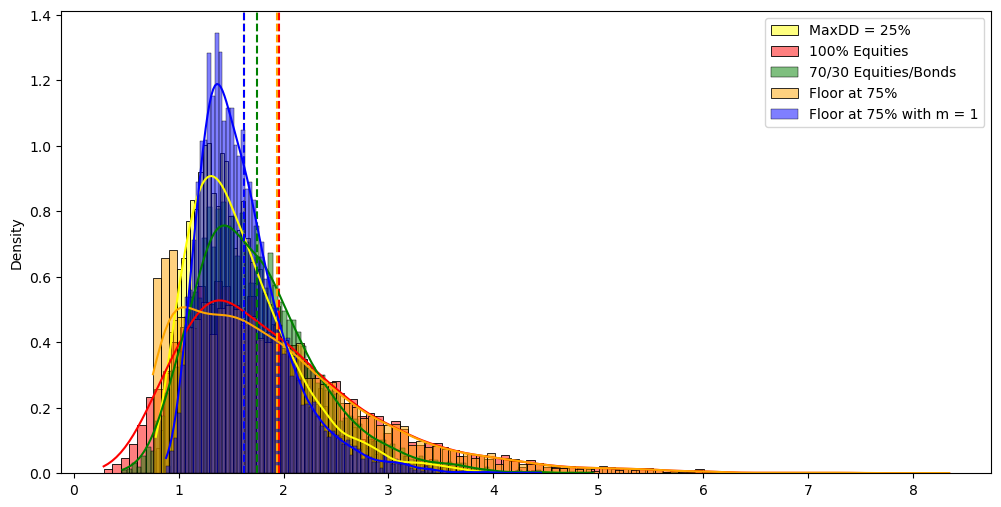

In [227]:
tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_floor75m1 = erk.terminal_values(rets_floor75m1)

plt.figure(figsize = (12, 6))
sns.histplot(tv_maxdd25, bins = 100, kde = True, color = "yellow", label = "MaxDD = 25%", stat = "density")
plt.axvline(tv_maxdd25.mean(), color = "yellow", linestyle = "--")
sns.histplot(tv_eq, bins = 100, kde = True, color = "red", label = r"100% Equities", stat = "density")
plt.axvline(tv_eq.mean(), color = "red", linestyle = "--")
sns.histplot(tv_7030b, bins = 100, kde = True, color = "green", label = r"70/30 Equities/Bonds", stat = "density")
plt.axvline(tv_7030b.mean(), color = "green", linestyle = "--")
sns.histplot(tv_floor75, bins = 100, kde = True, color = "orange", label = r"Floor at 75%", stat = "density")
plt.axvline(tv_floor75.mean(), color = "orange", linestyle = "--")
sns.histplot(tv_floor75m1, bins = 100, kde = True, color = "blue", label = r"Floor at 75% with m = 1", stat = "density")
plt.axvline(tv_floor75m1.mean(), color = "blue", linestyle = "--")
plt.legend()

In [266]:
# b1 is a 15 year bond with face value 1000 which pays 5% coupon rate semi-annually
# b2 is a 5 year bond with face value 1000 which pays 6% coupon rate quarterly
# b3 is a 10 year bond with face value 1000 which pays 0% coupon rate annually
# yield curve is flat at 5%


In [267]:
b1_price = erk.bond_price(15, 1000, 0.05, 2, 0.05)
b2_price = erk.bond_price(5, 1000, 0.06, 4, 0.05)
b3_price = erk.bond_price(10, 1000, 0, 1, 0.05)

b1_price, b2_price, b3_price

(0    1000.0
 dtype: float64,
 0    1043.99829
 dtype: float64,
 0    613.913254
 dtype: float64)

In [270]:
b1 = erk.bond_cash_flows(15, 1000, 0.05, 2)
b2 = erk.bond_cash_flows(5, 1000, 0.06, 4)
b3 = erk.bond_cash_flows(10, 1000, 0, 1)

In [268]:
b1_md = erk.macaulay_duration(erk.bond_cash_flows(15, 1000, 0.05, 2), 0.05/2)/2
b2_md = erk.macaulay_duration(erk.bond_cash_flows(5, 1000, 0.06, 4), 0.05/4)/4
b3_md = erk.macaulay_duration(erk.bond_cash_flows(10, 1000, 0, 1), 0.05/1)/1

b1_md, b2_md, b3_md

(10.72677495379012, 4.373363222636413, 10.0)

In [307]:
liabilities = pd.Series(data=[100000, 200000, 300000], index=[3, 5, 10])

In [308]:
erk.macaulay_duration(liabilities, 0.05)

6.750917852744651

In [309]:
b2 = erk.bond_cash_flows(5, 1000, 0.06, 4)
b3 = erk.bond_cash_flows(10, 1000, 0, 4)

In [310]:
erk.match_durations(liabilities, b2, b3, 0.05)

1.4041485057121978